In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from src.model03 import Schelling

Now we instantiate a model instance: a 20x20 grid, with an 80% chance of an agent being placed in each cell, and approximately 30% of agents set as minorities.

In [2]:
model_height=20
model_width=20
density=0.8
minority_pc = 0.3

model = Schelling(model_height, model_width, density, minority_pc)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

0


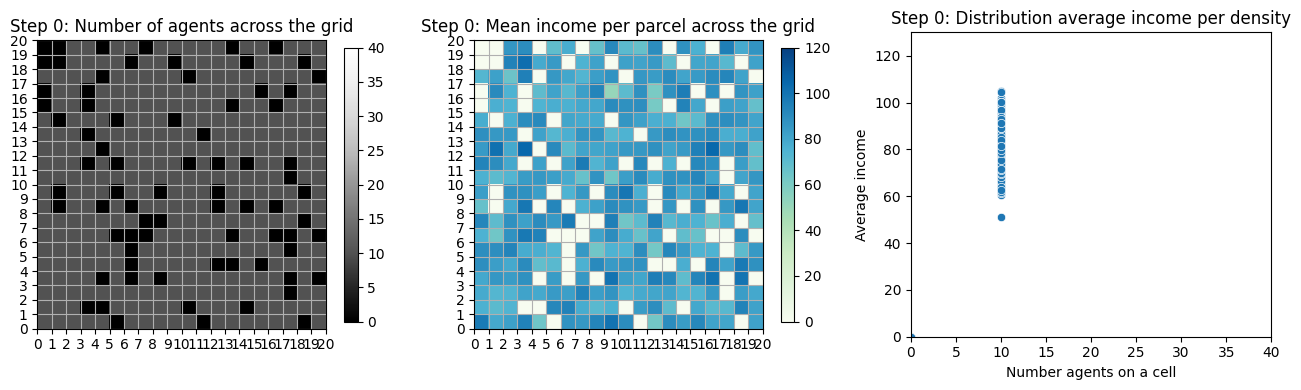

1


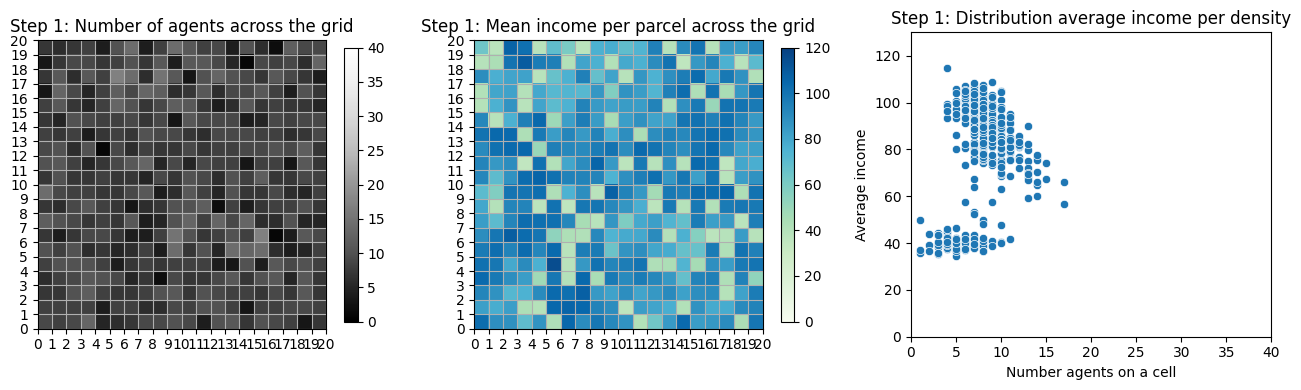

2


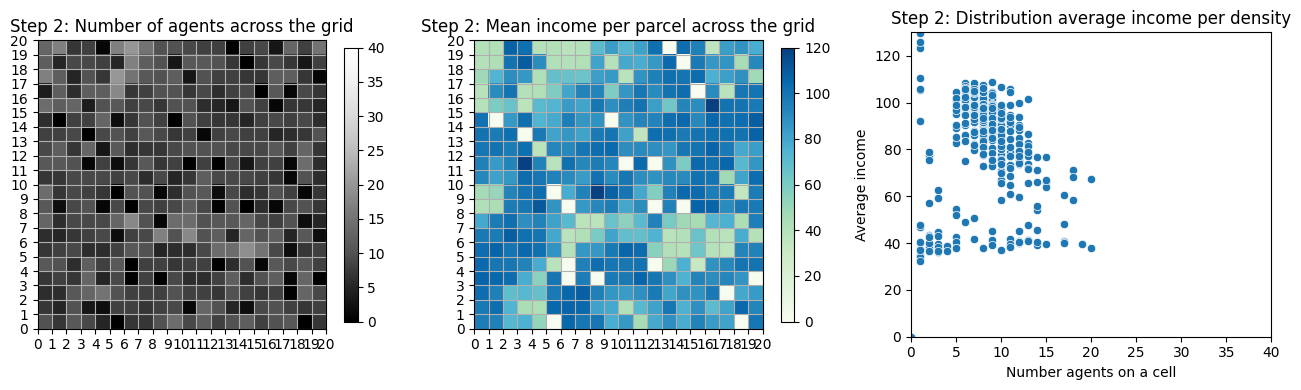

3


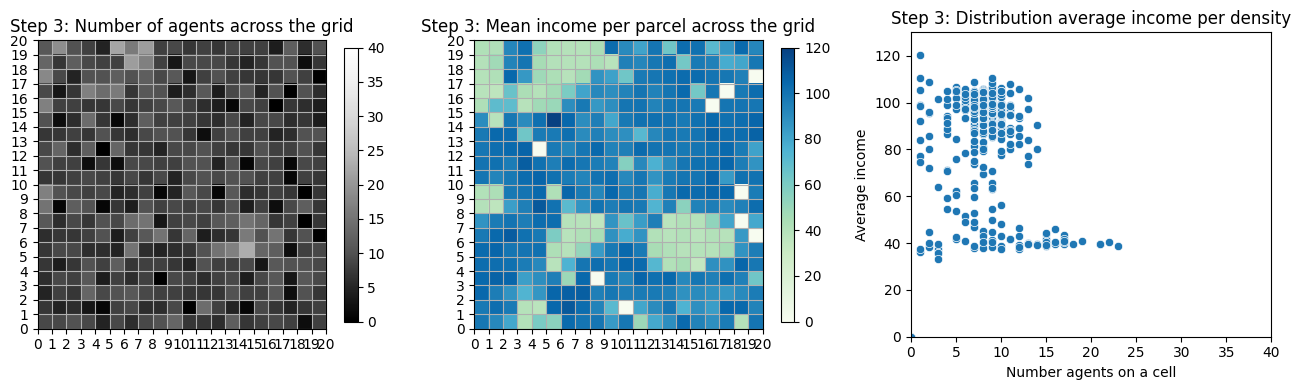

4


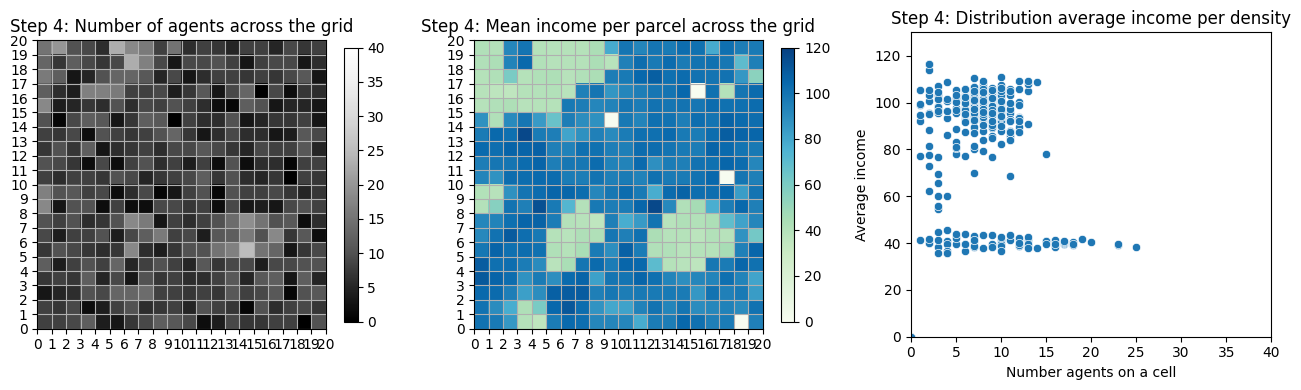

5


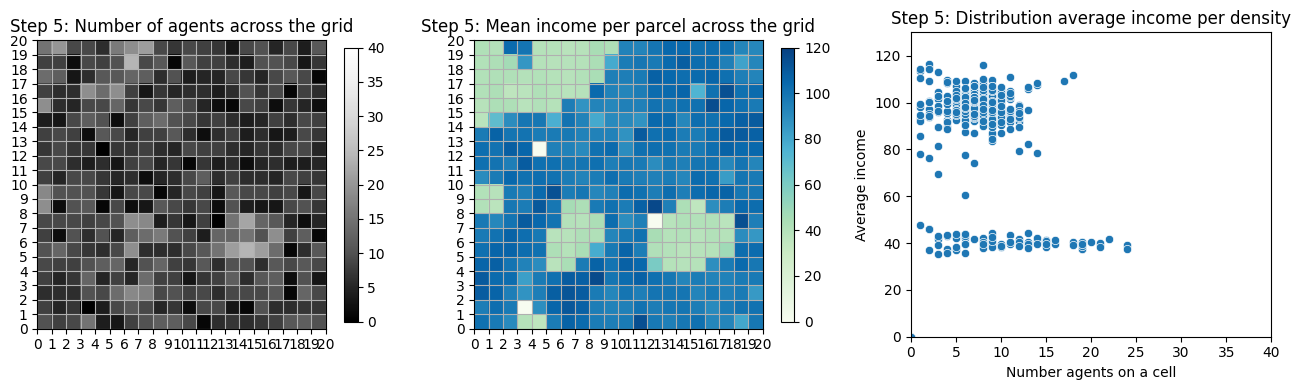

6


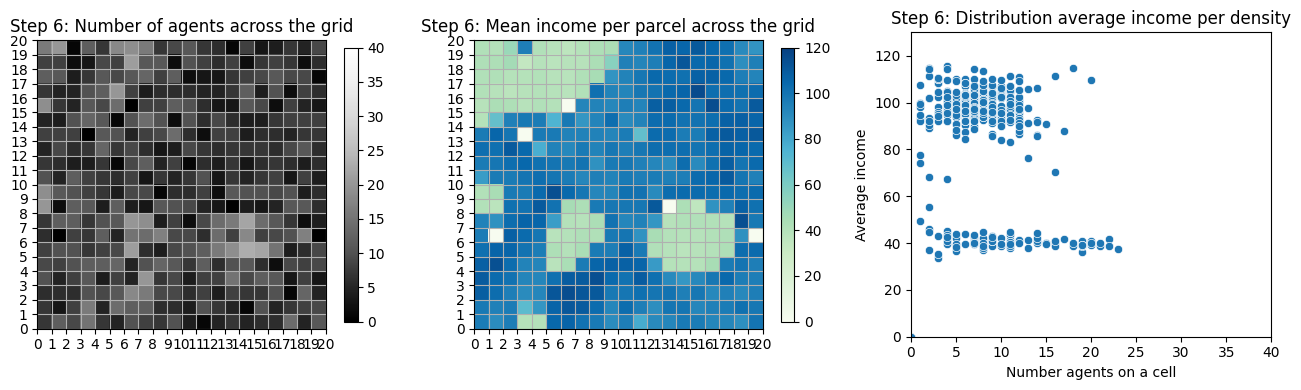

7


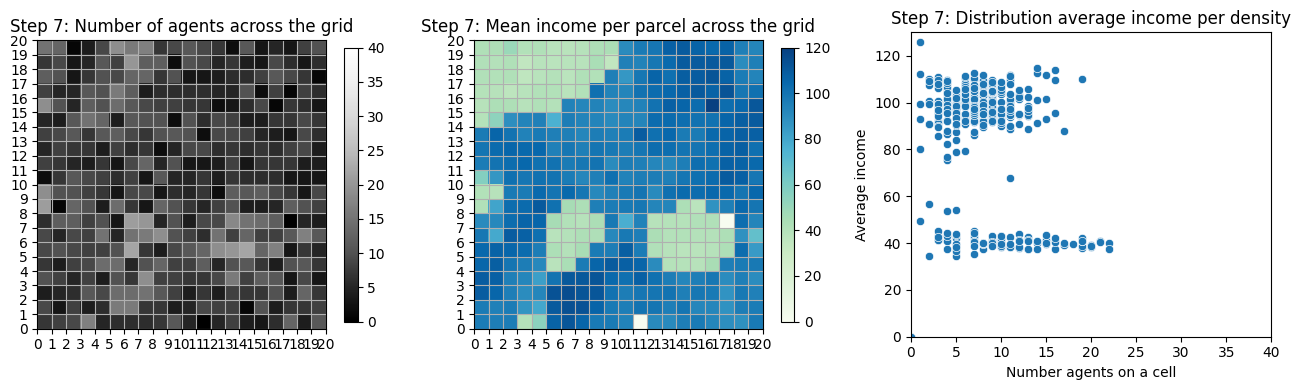

8


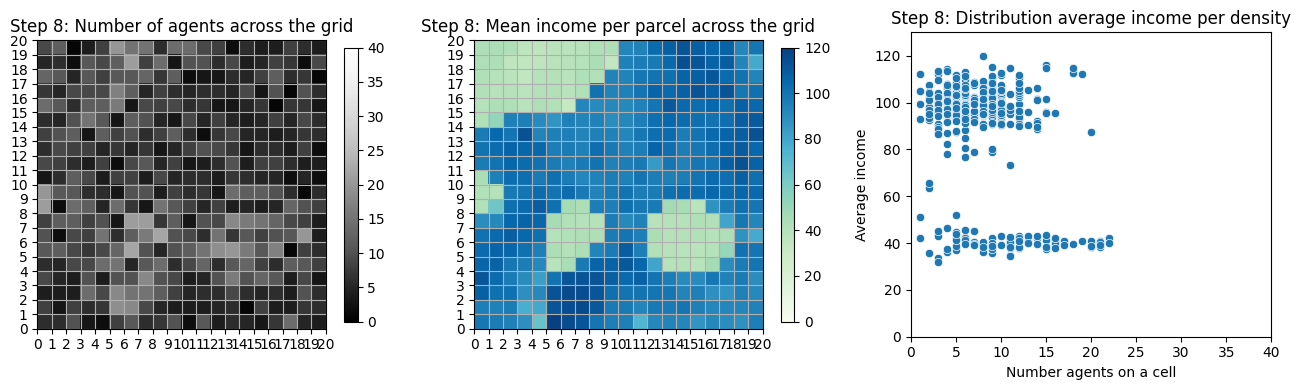

9


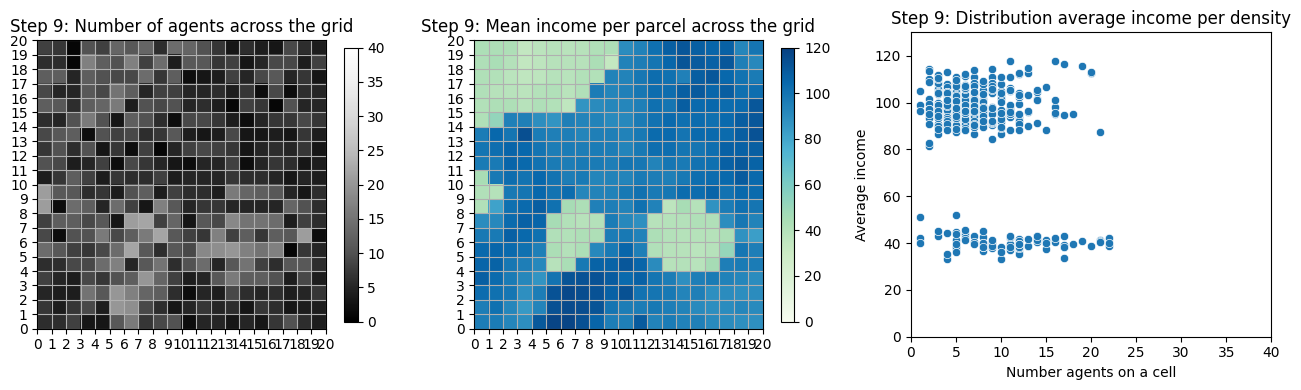

In [3]:
#Running the model for a certain amount of steps
while model.schedule.steps < 10:
    model.step()

## Transforming plots into a video ##

**Make sure that there are no images in the image folder that are from a previous** (This is the case if the run above was shorter than the previous one)

In [ ]:
import imageio
import os

image_folder = '../Model3/modelrun_images'  # Replace this with your image folder path
video_name = 'output_video.mp4'  # Output video file name
output_folder = '../Model3'

images = []
file_names = sorted([os.path.join(image_folder, fn) for fn in os.listdir(image_folder) if fn.endswith('.png')])

for file_name in file_names:
    images.append(imageio.imread(file_name))

# Save the images as a video
video_path = os.path.join(output_folder, video_name)
imageio.mimsave(video_path, images, fps=1)

print(f"Video created: {video_path}")

## Analysing the results (Heatmaps) ##

The plots below are visualisation of the grid and how certain (properties of) agents are distributed throughout.

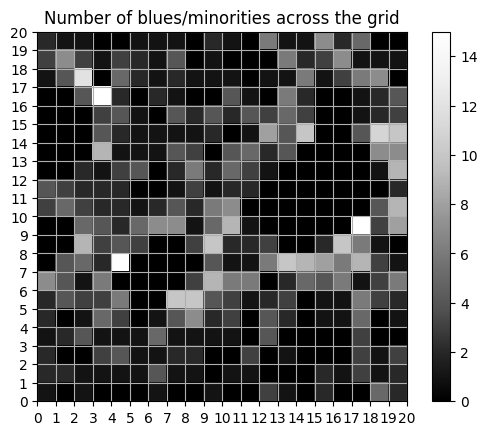

In [4]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    number_blues = 0
    cell_content = cell[0]
    x = cell[1][0]
    y = cell[1][1]
    for agent in cell_content:
        if agent.type == 1:
            number_blues += 1
    agent_counts[x][y] = number_blues
plt.imshow(agent_counts,  cmap="Greys_r",interpolation='nearest', extent=(0, model.grid.width, 0, model.grid.height))
plt.title('Number of blues/minorities across the grid')
plt.colorbar()

# Set grid lines to be every 1 unit
plt.xticks(np.arange(0, model.grid.width+1, 1))
plt.yticks(np.arange(0, model.grid.height+1, 1))

# Add grid
plt.grid(True)
plt.show()

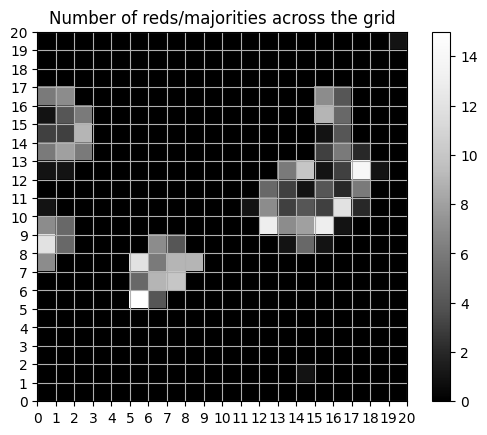

In [5]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    number_reds = 0
    cell_content = cell[0]
    x = cell[1][0]
    y = cell[1][1]
    for agent in cell_content:
        if agent.type == 0:
            number_reds += 1
    agent_counts[x][y] = number_reds
plt.imshow(agent_counts,cmap="Greys_r", interpolation='nearest', extent=(0, model.grid.width, 0, model.grid.height))
plt.title('Number of reds/majorities across the grid')
plt.colorbar()

# Set grid lines to be every 1 unit
plt.xticks(np.arange(0, model.grid.width+1, 1))
plt.yticks(np.arange(0, model.grid.height+1, 1))

# Add grid
plt.grid(True)
plt.show()